In [236]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.io 
import librosa 
import librosa.display 
import wave
from glob import glob  #for reading files 
import glob 
import pickle as pk
import pickle
import csv 
import matplotlib.image as img
from skimage import io
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image #load images in python and convert it to RGB format

### Path to the Data and walk through the sessions of each bird

In [240]:
"""
- set the path for the wav files within session within bird_folder
- append .wav names in data["path_spec"], 
         birdname   in data["bird_name"],
         path_file  in data["file_path"]
- Files are sorted correctly, if not then SORT THEM 1-10"""

path_bird = "/home/ahmedabdalsattar/Desktop/CNN_data/"

data = {"labels":[], 
        "spec_name":[], 
        "time_length":[],
       "file_path":[],
       "spec_path":[]}
    
for i,(dirpath,dirnames,filenames) in enumerate(os.walk(path_bird)):
    
    if dirpath is not path_bird:     
        basename = os.path.basename(dirpath)
        if basename == '.ipynb_checkpoints':
            pass 
        else:
            dirpath_comp = dirpath.split("/")
            
            
        for f in filenames:
            file_path = os.path.join(dirpath,f)
            base = os.path.basename(file_path)
            if base.endswith('.wav'):
                
                data["spec_name"].append(base)
                data["file_path"].append(file_path)
            else:
                pass

In [ ]:
# Hyperparameters:

"""
- create a sampling frequency for each file
- find time length of each file and append it in data[time_length]
- create images.PNG and save them in spec_img folder"""

# notes 
"""1- Make Sure Data are not duplicated in the folder in case you run the code multiple times for the same dataset
   2- sample rate and how much time need to take from each file (one second or avg or more or less)depend on boutes"""


path_img = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/"

sampling_freq = 15000
n_fft = 2048
hop_length = 110


for g in range(len(data["spec_name"])):
    signal,sr = librosa.load(data["file_path"][g],sr=sampling_freq)
    time_period = librosa.get_duration(signal,sr=sampling_freq)
    signal,sr = librosa.load(data["file_path"][g],sr=sampling_freq,duration=1)

    plt.figure(figsize=(7,7))
    spec = librosa.feature.melspectrogram(signal,sr=sampling_freq,n_fft=n_fft,hop_length=hop_length)
    spec_db = librosa.power_to_db(spec,ref=np.max)
    librosa.display.specshow(spec_db,hop_length=hop_length)
    
    file_name = os.path.splitext(data["file_path"][g])
    file_name = file_name[-2]
    name_img = os.path.basename(file_name)
    plt.savefig(os.path.join(path_img , "{spe}".format(spe = name_img) + ".png"))
    data["spec_path"].append(name_img+".png")
    data["time_length"].append(time_period)
    

### Export Data into CSV file 

In [257]:

# path_csv_file = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/'

# bird_name = []
# # def data_csv_file(path_csv_file):

# with open(os.path.join(path_csv_file,'data_file.csv'),'w',newline='') as file:
#     fieldnames = ["spec_name","labels","wav_name","length_time","path_file"]
#     writer = csv.DictWriter(file,fieldnames=fieldnames)
#     writer.writeheader()
# with open(os.path.join(path_csv_file,'data_file.csv'),'a',newline='')as file:
#     writer = csv.writer(file)
#     for i in range(1,len(data["time_length"])):
#         writer = csv.DictWriter(file,fieldnames=fieldnames)
#         writer.writerow({'wav_name':data["spec_name"][i], 'spec_name':data["spec_path"][i],'path_file':data["file_path"][i],'length_time':data["time_length"][i]})



### Call .csv file (data) and turn to DataFrame 

In [378]:
path_csv_file = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/data_file-1.csv'

dataframe = pd.read_csv(path_csv_file)

In [379]:
# print('Total size' , data.size)
# print('Shape of data' ,data.shape)
dataframe 

,spec_name,labels,wav_name,length_time,path_file
0,2021-02-15_POI1.png,1.0,2021-02-15_POI1.wav,2.997733,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
1,2021-02-15_POI2.png,1.0,2021-02-15_POI2.wav,2.477867,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
2,2021-02-15_POI3.png,1.0,2021-02-15_POI3.wav,0.791467,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
3,2021-02-15_POI4.png,1.0,2021-02-15_POI4.wav,1.517867,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
4,2021-02-15_POI5.png,1.0,2021-02-15_POI5.wav,2.230133,/home/ahmedabdalsattar/Desktop/CNN_data/z_m10g...
...,...,...,...,...,...
794,2020-10-12_POI95.png,2.0,2020-10-12_POI95.wav,1.279333,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
795,2020-10-12_POI96.png,1.0,2020-10-12_POI96.wav,1.126200,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
796,2020-10-12_POI97.png,1.0,2020-10-12_POI97.wav,1.210600,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...
797,2020-10-12_POI98.png,1.0,2020-10-12_POI98.wav,1.817533,/home/ahmedabdalsattar/Desktop/CNN_data/z_y5k3...


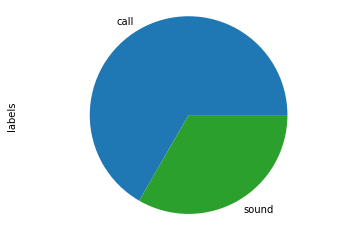

,spec_name,wav_name,length_time,path_file
labels,,,,
0.0,29,29,29,29
1.0,431,431,431,431
2.0,338,338,338,338


In [380]:
"""check out the data if its balanced to have equal number of classes (noise,sound,calls)"""

import pandas as pd
from matplotlib.pyplot import pie, axis, show
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'label': ['noise', 'sound', 'call'], 'labels': [0, 1, 2]})

df.labels.groupby(df.label).sum().plot(kind='pie')
plt.axis('equal')
plt.show()


count = dataframe.groupby(['labels']).count() 
count

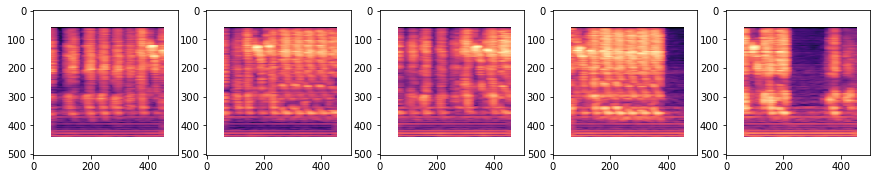

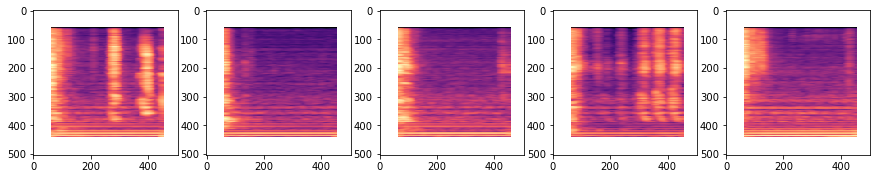

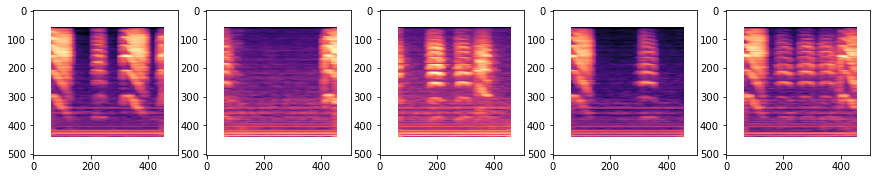

In [381]:
"""display example of images that shows Sound(row1),noise(row2),calls(row3)"""

import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(dataframe[dataframe['labels'] == 1]['spec_name'][-5:]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))

fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(dataframe[dataframe['labels'] == 0]['spec_name'][:5]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))

fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(dataframe[dataframe['labels'] == 2]['spec_name'][:5]):
    path_spec = spectrom_path + idx
    ax[i].imshow(img.imread(path_spec))

In [368]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [382]:
class CactiDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [383]:
train_transform = transforms.Compose([                              
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

test_transform = transforms.Compose([                              
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

In [387]:
train, valid_data = train_test_split(dataframe, test_size=0.2)

In [391]:
# read data from .csv file 
path_csv = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/data_file-1.csv'
data = pd.read_csv(path_csv)

# split the data into train and test sets to save each of them in a .csv file 
path_dir = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files"
def split_data(data,path_dir):
    train_data, test_data = train_test_split(data,test_size=0.2,random_state=1)
    if not os.path.exists(path_dir):
        os.makedirs(path_dir)
    return train_data,test_data

train_data = split_data(data,path_dir)[0]
test_data = split_data(data,path_dir)[1]



In [395]:
# save train and test set in a .csv_files (train_data.csv,test_data.csv)
train_x = train_data.to_csv(r'/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_data.csv',index=False)
test_x = test_data.to_csv(r'/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_data.csv',index=False)


In [396]:
#read data in .csv files 
path_train = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_data.csv'
path_test = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_data.csv'
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [435]:


# .pkl_files (train_set,test_set)
path_train_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/train_pickle.pkl"
path_test_pkl = "/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/CSV_files/test_pickle.pkl"

def save_pkl(path_pkl,data):
    with open (path_pkl,'wb') as file1:
        pickle.dump(data,file1)

        
save_pkl(path_train_pkl,df_train)
save_pkl(path_test_pkl,df_test)

#read .pkl files 
pickle_off = open(path_train_pkl,"rb")
read_pkl1 = pickle.load(pickle_off)

pickle_off = open(path_test_pkl,"rb")
read_pkl2 = pickle.load(pickle_off)



In [439]:
# train_data = CactiDataset(train, df_train, train_transform )
# valid_data = CactiDataset(valid_data, df_test, test_transform )
# # test_data = CactiDataset(submission, test_path, test_transform )


NameError: name 'transform' is not defined

In [419]:
num_epochs = 35
num_classes = 2
batch_size = 25
learning_rate = 0.001

In [418]:
# CPU or GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [420]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
# test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

In [440]:
# trainimages, trainlabels = next(iter(train_loader))

# fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
# print('training images')
# for i in range(5):
#     axe1 = axes[i] 
#     imshow(trainimages[i], ax=axe1, normalize=False)

# print(trainimages[0].size())

In [ ]:
spectrom_path = '/home/ahmedabdalsattar/Desktop/Birdsong_PyTorch/spec_img/'
name_image = dataframe["spec_name"]

for i in range(len(name_image)):
    path_spec = spectrom_path + name_image[i]
    image_open = Image.open(path_spec)
    read_img = np.asarray(image_open)
    torch_img = torch.from_numpy(read_img)
    
    fig,ax = plt.subplots()
    ax.imshow(torch_img)


In [232]:
conv1 = nn.Conv2d(3,20,3)
conv2 = nn.Conv2d(20,40,3)
pool = nn.MaxPool2d(2,2)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


"""

- kernel_size = is the filter size 

- inside the convolutional layer, the input channel are paired with 
with conv-filter to perform the conv-operation
- result of this is the Output_channel
- out_channel = number of filters, each filter produce an output_channel"""

# input_channel = 3 (the colors which here is RGB =3)
#out_channel = 20 (#filters and output channels(features maps. for linear called features))
# output_feature in nn.Linear is 3 since we need to output 3 classes (no_song,song,call)

"""we increase the ou_channels as we add more conv_layers
and after switch to linear layers we shrink down the out_features as we 
filter down to the number of output classes we have"""
class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=40, kernel_size=3) # kernel is 3X3 
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(40*142*142, 320)
        self.fc2 = nn.Linear(320, 3)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1,40*142*142) #flatten for the fully connected layer
#         x = x.view(x.shape[0],-1)
#         print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [ ]:
model = CNN()
print(model)
device = ("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        # labels CrossEntropyLoss expects targets to be class indices,
        #and hence Long Tensors, but you gave it a Float Tensor.
        labels = labels.to(device=device, dtype=torch.int64)
        # squeeze the dimensions to labels.squeez(1)
#         labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
# PATH = ''
# torch.save(model.state_dict(), PATH)

# with torch.no_grad():
#     n_correct = 0
#     n_samples = 0
#     n_class_correct = [0 for i in range(10)]
#     n_class_samples = [0 for i in range(10)]
#     for images, labels in test_loader:
#         images = images.to(device)
#         labels = labels.to(device)
#         outputs = model(images)
#         # max returns (value ,index)
#         _, predicted = torch.max(outputs, 1)
#         n_samples += labels.size(0)
#         n_correct += (predicted == labels).sum().item()
        
#         for i in range(batch_size):
#             label = labels[i]
#             pred = predicted[i]
#             if (label == pred):
#                 n_class_correct[label] += 1
#             n_class_samples[label] += 1

#     acc = 100.0 * n_correct / n_samples
#     print(f'Accuracy of the network: {acc} %')

#     for i in range(10):
#         acc = 100.0 * n_class_correct[i] / n_class_samples[i]
#         print(f'Accuracy of {classes[i]}: {acc} %')

In [ ]:
# # keeping-track-of-losses 
# train_losses = []
# valid_losses = []

# for epoch in range(1, num_epochs + 1):
#     # keep-track-of-training-and-validation-loss
#     train_loss = 0.0
#     valid_loss = 0.0
    
#     # training-the-model
#     model.train()
#     for data, target in train_loader:
#         # move-tensors-to-GPU 
#         data = data.to(device)
#         target = target.to(device)
#         # clear-the-gradients-of-all-optimized-variables
#         optimizer.zero_grad()
#         # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
#         output = model(data)
#         # calculate-the-batch-loss
#         loss = criterion(output, target)
# # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
#         loss.backward()
#         # perform-a-ingle-optimization-step (parameter-update)
#         optimizer.step()
#         # update-training-loss
#         train_loss += loss.item() * data.size(0)
        
#     # validate-the-model
#     model.eval()
#     for data, target in test_loader:
        
#         data = data.to(device)
#         target = target.to(device)
        
#         output = model(data)
        
#         loss = criterion(output, target)
        
#         # update-average-validation-loss 
#         valid_loss += loss.item() * data.size(0)
    
#     calculate-average-losses
#     train_loss = train_loss/len(train_loader.sampler)
#     valid_loss = valid_loss/len(test_loader.sampler)
#     train_losses.append(train_loss)
#     valid_losses.append(valid_loss)
# # print-training/validation-statistics 
#     print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss))